# Домашнее задание

## Задание 1


Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?

2) Критикам нравятся больше игры на PC или на PS4?

3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

сформулируйте нулевую и альтернативную гипотезы;
выберите пороговый уровень статистической значимости;
опишите полученные результаты статистического теста.

In [27]:
import pandas as pd

In [28]:
data = pd.read_csv('video_games_sales.csv')
data.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [29]:
# переведем годы к integer
data['Year'] = data.Year.astype('Int64')

ho - критики  относятся к спортивным играм также как и ко всем остальным жанрам игр

h1 - критики хорошо относятся к спортивынм играм

In [77]:
avg = data['Critic_Score'].mean()

In [95]:
# заменим средним арифметичиским пустые значения
data.Critic_Score.fillna(avg, inplace=True)

In [96]:
A = data.loc[data['Genre'] == 'Sports'].Critic_Score
B = data.loc[data['Genre'] != 'Sports'].Critic_Score

In [98]:
import scipy.stats 
from scipy import stats
t, p = stats.ttest_ind(A, B)
t, p

(1.558751187856976, 0.11906095349973794)

Значение p-value больше, чем 5%, следовательно верна гипотеза h0, что критики никак не выделяют спортивнае игры относительно остальных жанров

In [33]:
sports = data[['Genre', 'Critic_Score']].groupby('Genre').sum()
sports.head(20)

,Critic_Score
Genre,
Action,7004.4
Action-Adventure,761.7
Adventure,2887.7
Board Game,5.3
Education,7.5
Fighting,2423.4
MMO,78.1
Misc,2327.4
Music,197.8


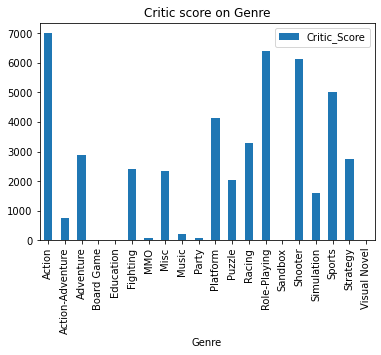

In [34]:
sports.plot(kind='bar', 
                title='Critic score on Genre')

Критики достаточно хорошо относятся к спорптивным играм

ho - критикам  нравятся игры на PC также, как на PC4

h1 - критикам больше нравятся игры на PC4

In [137]:
games_platforms = data.loc[(data['Platform'] == 'PC') | (data['Platform'] == 'PS4')].Critic_Score
games_PC4 = data.loc[data['Platform'] == 'PS4'].Critic_Score

In [138]:
t, p = stats.ttest_ind(games_platforms, games_PC4)
t, p

(-1.442852488840134, 0.1490836512348651)

Значение p-value больше 5%, а значит верна гипотеза ho, значения м/у выборками незначительно и мы не можем сказать на какой платформе критики больше предпочитают игры

In [37]:
# продажи в разрезе платформ
games_by_platforms = data[['Critic_Score', 'Platform']].groupby('Platform').sum()
games_by_platforms

,Critic_Score
Platform,
2600,0.0
3DO,0.0
3DS,1568.5
5200,0.0
7800,0.0
...,...
XBL,2347.3
XOne,447.7
ZXS,0.0


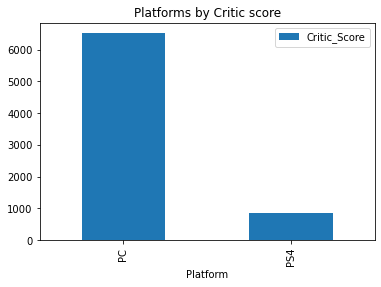

In [38]:
games_by_platforms.loc[['PC',  'PS4']].plot(kind='bar', 
                                            title='Platforms by Critic score')

Критикам больше нравятся игры на PC

ho - критикам нравятся стрелялки и стратегии одинакого

h1 - критикам больше нравятся стратегии

In [130]:
Shooter_and_Action = data.loc[(data['Genre'] == 'Action') | (data['Genre'] == 'Shooter')].Critic_Score
Action = data.loc[data['Genre'] == 'Action'].Critic_Score

In [131]:
t, p = stats.ttest_ind(Shooter_and_Action, Action)
t, p

(2.7042118009030403, 0.0068524783950414045)

Значение p-value меньше 5%, разница м/у выборками весомая, значит верна гипотеза h1 "критикам больше нравяться стратегии, чем стрелялки"

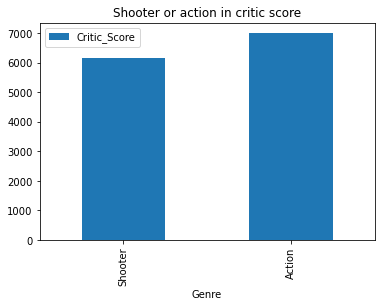

In [40]:
sports.loc[['Shooter', 'Action']].plot(kind='bar', 
                           title='Shooter or action in critic score')

Критикам больше нравится стратегии

# Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;

2) Удалите мусорные символы;

3) Удалите стоп-слова;

4) Привидите все слова к нормальной форме;

5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df.Message)

names = tfidf.get_feature_names()

tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

Можете поэкспериментировать с параметрами TfidfVectorizer;

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [41]:
spam = pd.read_csv('spam.csv')
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
# приведем все слова к нижнему регистру
spam_lower = [spams.lower() for spams in spam.Message]
# проверим
spam_lower[0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [43]:
import re
# уберем все служебные символы
print(len(spam_lower[15]))
only_words_spam = [re.sub('[\W_]+',' ', text) for text in spam_lower]
# проверим
print(len(only_words_spam[0]))
only_words_spam[0]

149
103


'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat '

In [44]:
# разделим все на слова
spams_splitted = [spam.split() for spam in only_words_spam]
# сколько слов?
len(spams_splitted[0])

20

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79055\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
# удаляем стоп слова
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))
without_sw = [[word for word in spam if word not in stopwords_set] for spam in spams_splitted]
len(without_sw[0])

16

In [47]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\79055\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in without_sw]
lemmatized_text[15]

['xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'next',
 'txt',
 'message',
 'click',
 'http',
 'wap',
 'xxxmobilemovieclub',
 'com',
 'n',
 'qjkgighjjgcbl']

In [49]:
# преобразуем все сообщения в вектора TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english') # игнорирует стоп слова
tfidf_matrix = tfidf.fit_transform(spam.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split

In [56]:
X = tfidf_matrix[['00']]
y = tfidf_matrix['000']

In [57]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
X_const = sm.add_constant(X_train)

In [59]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    000   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03005
Date:                Mon, 25 Jan 2021   Prob (F-statistic):              0.862
Time:                        16:46:09   Log-Likelihood:                 10537.
No. Observations:                3900   AIC:                        -2.107e+04
Df Residuals:                    3898   BIC:                        -2.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      4.431      0.0

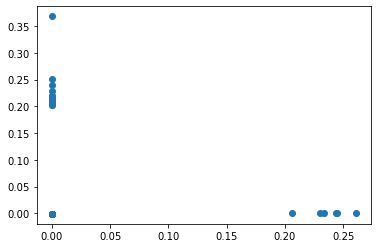

In [61]:
# посмотрим на остатки
import matplotlib.pyplot as plt
plt.scatter(X_const.iloc[:, 1], results.resid)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()

In [64]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
test_encoded = lab_enc.fit_transform(y_test)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded))

continuous
binary
multiclass


In [65]:
lr.fit(X_train, encoded)

LogisticRegression()

In [66]:
y_pred = lr.predict(X_test)

In [67]:
# оценка точности получившейся модели
from sklearn.metrics import accuracy_score
accuracy_score(test_encoded, lr.predict(X_test))

0.9958133971291866

In [68]:
import sklearn

In [69]:
sklearn.metrics.confusion_matrix( test_encoded , y_pred ,  labels = None , sample_weight = None , normalize = None )

array([[1665,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0]], dtype=int64)

In [74]:
# дф с предсказанными и фактическими значениями
result = pd.DataFrame([y_test, y_pred]).T
result

,000,Unnamed 0
3245,0.000000,NaN
944,0.000000,0.0
1044,0.000000,0.0
2484,0.000000,NaN
812,0.000000,0.0
...,...,...
2505,0.000000,NaN
2525,0.000000,NaN
4975,0.000000,NaN
650,0.517133,0.0
